# Enhancing House Prices Prediction Model

**Rawan Alturkestani**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract


This work contained a prediction using linear regression on a three different set of variables SalePrice, OverallQual, and TotRmsAbvGrd. Each treated as independent variable and tested along 9 different variables of the highest correlation for each, the results for each subsequently are $0.85$ , $0.72$ , and $0.8$ where the higher the prediction the closer the score is to $1.0$. Then, multiple facts are shared to explain the result for each given the nature of the dataset, as well the claculation of the result is explained in the result section.

[Back to top](#Index)


## 1. Introduction

In this project, I am using houseSmallData.csv dataset which includes a set of characteristics of properties. First, I started with observing the data and cleaning the dataset from nulls, zeros, and duplicates if existed. Then, once the dataset is cleaned it should be ready to analyze and I started by analyzing multiple variables including the price of the property represented by SalePrice column and the impact of other characteristics on the price. In order to, analyze the impact I calculated the correlation of SalePrice variable against 9 other variables and moved into using a linear prediction model and for that I used linear regression. Once the prediction is made, I needed to evaluate the accuracy so I calculated a score using score function to show the prediction accuracy and enhance based on it, and as well compared the prediction result of houseSmallData.csv to another dataset jtest.csv and compared the result of each. Furthermore, I went into analyzing other variable sets to discover the nature of the dataset. Finally, to visualize the results I used scatter figures and histograms for each set of variables I used.

[Back to top](#Index)

## 2. The Data
In this section I exercised observing the data and cleaning the data by performing below actions:
* Importing all necessary libraries 
* Reading csv file to load the data
* Observing quality of the data and analyzing:
   + Null values
   + Zeros
   + Duplicate rows
   + Data type mapping to each column values
* Showing indicative graphs as histogram and scatter of the Y value or Y target for linear regression



[Back to top](#Index)

### 2.1 Import the Data

The necessary libraries imported are: 
1. Pandas used to work with datasets. And to utilize is functions for analyzing, cleaning, exploring, and manipulating data.
2. Numpy used to work with arrays and its functions for working in linear algebra, fourier transform, and matrices. 
3. matplotlib used to visualized the data for easier analysis by using the static, and its graphical figures.
4. sklearn used as a machine learning library that provides a selection of efficient tools for machine learning and statistical modeling, used in this project to utilized linear regression.





In [5]:
# importing each library while using a shotrnaming for each after "as" 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model

Started with reading the CSV file shared *houseSmallData.csv* as below using pandas and iloc function to load specific rows, i am loading 100 row with the variable train below. 

In [6]:
#uploading the sample data, and making sure to use index_col=0 to exclude the first unnamed column which is a duplicate 
sample = pd.read_csv('C:/Users/Rawan/Desktop/MITCN/M7/houseSmallData/houseSmallData.csv', index_col=0)
#choosing only 100 row and all columns
train = sample.iloc[0:,:]

[Back to top](#Index)

### 2.2 Data Exploration

After loading the sample data, I started with exploring the data by using multiple pandas library functions and I can see the data contain 81 column and 100 row. As well I took a quick look at the first 5 rows in the sample data. 

From looking at the sample data I observe null cells and zeros as well, and no duplicates seemed to exist.


In [7]:
#checking the shape to learn the called rows and columns 
print(train.shape)
#showing the first rows to take a quick look at the data  
train.head()

(100, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Looking into the number of null values by using function *info()* to show nun null values at type of each column. *info()* function has an advantage of showing the data type as we are going to excercise using numerical values only its improtant to see how much values we are ignoring and if those values are stored under the correct column type.  

In [8]:
# take a look at non null values count 
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             100 non-null    int64  
 1   MSSubClass     100 non-null    int64  
 2   MSZoning       100 non-null    object 
 3   LotFrontage    86 non-null     float64
 4   LotArea        100 non-null    int64  
 5   Street         100 non-null    object 
 6   Alley          6 non-null      object 
 7   LotShape       100 non-null    object 
 8   LandContour    100 non-null    object 
 9   Utilities      100 non-null    object 
 10  LotConfig      100 non-null    object 
 11  LandSlope      100 non-null    object 
 12  Neighborhood   100 non-null    object 
 13  Condition1     100 non-null    object 
 14  Condition2     100 non-null    object 
 15  BldgType       100 non-null    object 
 16  HouseStyle     100 non-null    object 
 17  OverallQual    100 non-null    int64  
 18  OverallCond    1

Looking into columns based on data type as Object, float, and integer which we notice all are mapped correctly.  

In [9]:
# calling only object type columns
Object_cols = train.select_dtypes(include='object')
# calling only float type columns
float_cols = train.select_dtypes(include='float64')
# calling only Integer type columns
Int_cols = train.select_dtypes(include='int64')

Another way to collect null values is using *isnull()* pandas function and summation of all the counted null values among the columns and store it in dataframe named nulls.

In [10]:
# show the count of null values in the training sample and store it in a data frame 
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[0:20])
# print nulls dataframe
nulls

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
MasVnrType,60
FireplaceQu,54
LotFrontage,14
GarageType,6
GarageYrBlt,6
GarageFinish,6


Looking into the zero values in the sample data and below we can see that there is number of columns that barely have any data.

In [11]:
# extract the name of each column in train data sample
columns = list(train.columns.values)
# calculate the zero value count and store it in a dataframe
count_zeros = pd.DataFrame(train[columns]==0).sum().sort_values(ascending=False) 
# call only 30 results of the dataframe
count_zeros[0:25]

PoolArea         100
LowQualFinSF      98
3SsnPorch         98
ScreenPorch       95
BsmtHalfBath      93
MiscVal           91
BsmtFinSF2        91
EnclosedPorch     83
HalfBath          68
2ndFlrSF          65
MasVnrArea        60
BsmtFullBath      56
Fireplaces        54
WoodDeckSF        52
OpenPorchSF       42
BsmtFinSF1        34
BsmtUnfSF          7
GarageArea         6
GarageCars         6
TotalBsmtSF        3
FullBath           1
BedroomAbvGr       1
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
dtype: int64

As wello its important to look into duplicate fows, which I did using *duplicated()* pandas function, which returns a boolean value a True if there is duplicate and false if there is none. Which shows that it didn't trigger any True values. 

In [12]:
# looking for duplicate data 
dup= pd.DataFrame(train.duplicated(keep=False), columns = ['Result Per Column'])

Below I am showing multiple histograms using *matplotlib* library and to make quick observation on the values of SalePrice column. 

* First histogram is for the current data and it shows that its not normal distribution
* Second histogram I utilized numpy log() function to scale the values and to returns element-wise normal logarithms of an array 

Looking at the histograms below it shows that using the log gives us more of skewed normal distribution 

In [13]:
#creating a series 
salePrice = train['SalePrice']
#performe describe() on a series to show the details will be used to build the histogram (mean, variance, ..)
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

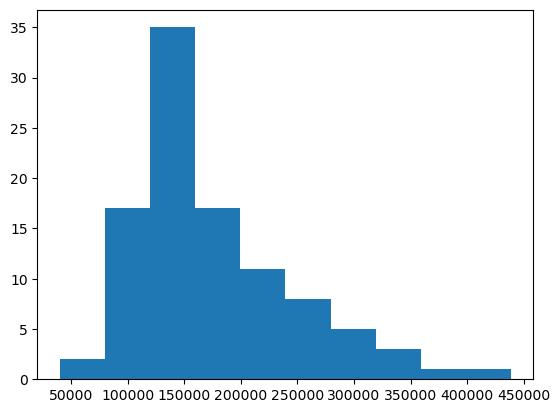

In [14]:
#SalePrice histogram to show the distribution of SalePrice column using salePrice series
plt.hist(salePrice)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

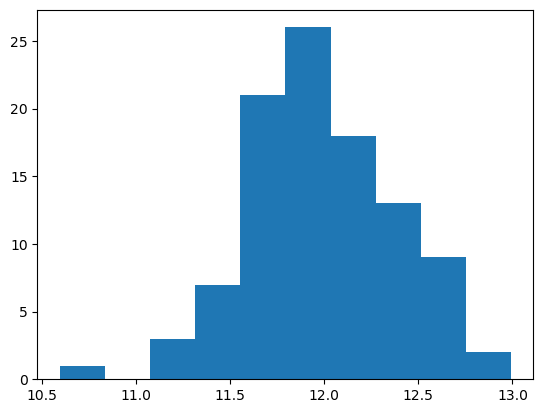

In [15]:
#use numpy log on SalePrice to returns a normal logarithmic distribution of an array 
plt.hist(np.log(salePrice))
plt.show

Observing Skewness which is a statistical term to estimate the shape of a distribution, it works on estimating the asymmetrical behavior rather than computing frequency. The distribution value of skweness can be described as below:
* Skew value equal to zero then its normal distributed 
* Skew value bigger than zero then the more weight in the left tail of the distribution
* Skew value smaller than zero then the more weight in the right tail of the distribution

Below skew of *SalePrice* shows bigger than zero (1.178) for the natural values and less than zero (-0.096) with log normal distribution.

In [16]:
# using skew for SalePrice
salePrice.skew()
# using skew for Log of SalePrice
np.log(salePrice).skew()

-0.09632240207755555

Used Scatter graph against log-normal distribution of SalePrice to see a correlatin between SalePrice and TotRmsAbvGrd.

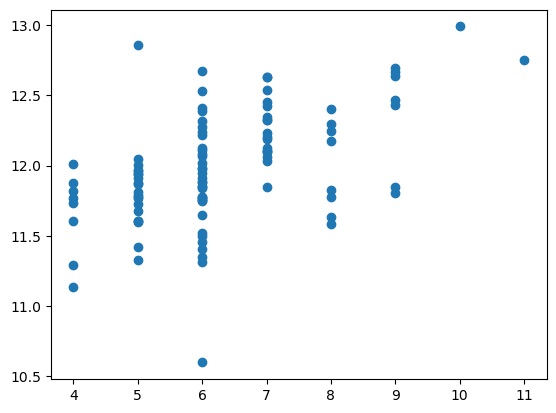

In [17]:
#new sale price data
target = np.log(salePrice)
#scatter plott against log-normal distribution of sale price to see a correlatin between SalePrice(target) and total rooms above ground  
plt.scatter(train['TotRmsAbvGrd'], y=target)

[Back to top](#Index)

### 2.3 Data Preparation

As of the above observation I noticed the existence of null valued rows and columns with only null values, as well columns with only zero values.  

- Its clear that there are missing values and some columns will be considered non valuable for any analysis as it doesn't provide any data so we can remove those columns from our analysis 
- We will need to remove the null values to repair the data, and below we will use *dropna()* function to delete all null values, and kept only numerical data
- Performed removal of majority zero cells columns which are above 90 zero cells out of 100
- We will end up reshaping the data to include only 32 columns instead of 81


In [18]:
# repair all columns of the nulls and keep only numerical values 
data = train.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
# check if there is any null values
sum(data.isnull().sum()!=0)
#print the new data frame
data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,73.5,9765,6,8,1993,1993,68.0,310,...,232,63,0,0,0,0,480,4,2009,185000
96,97,20,78.0,10264,7,5,1999,1999,183.0,1162,...,158,29,0,0,0,0,0,8,2006,214000
97,98,20,73.0,10921,4,5,1965,1965,48.0,520,...,120,0,0,0,0,0,0,5,2007,94750
98,99,30,85.0,10625,5,5,1920,1950,0.0,108,...,0,0,77,0,0,0,400,5,2010,83000


In [19]:
# take a look at the new shape 
data.shape

(100, 38)

In [20]:
# dropping columns with zeros count above 90 
zData = data.select_dtypes(include=[np.number]).interpolate().drop(labels = ['PoolArea','LowQualFinSF','3SsnPorch','ScreenPorch','BsmtHalfBath','MiscVal'] , axis=1)

print(zData.shape)
zData

(100, 32)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,2003.0,2,548,0,61,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1,1976.0,2,460,298,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,1,2001.0,2,608,0,42,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,1998.0,3,642,0,35,272,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,1,2000.0,3,836,192,84,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,73.5,9765,6,8,1993,1993,68.0,310,...,1,1993.0,2,420,232,63,0,4,2009,185000
96,97,20,78.0,10264,7,5,1999,1999,183.0,1162,...,0,1999.0,2,472,158,29,0,8,2006,214000
97,98,20,73.0,10921,4,5,1965,1965,48.0,520,...,0,1965.0,1,432,120,0,0,5,2007,94750
98,99,30,85.0,10625,5,5,1920,1950,0.0,108,...,0,1920.0,1,366,0,0,77,5,2010,83000


[Back to top](#Index)

### 2.4 Correlation

In this section I will be using correlation which is a statistical measure that indicates the extent of where two or more variables fluctuate in relation to each other, given below:
  + Positive correlation indicates the extent to which those variables increase or decrease in parallel.
  + Negative correlation indicates the extent to which one variable increases as the other decreases.

After cleaning the nulls I viewed the correlation between the set of values against each other 
+ SalePrice to see the top 9 correlated where I found the correlation with OverallQual, GrLivArea, GarageArea, GarageCars, YearBuilt, TotalBsmtSF, GarageYrBlt, FullBath, MasVnrArea.
+ I noticed the stongest correlation of SalePrice is with OverallQual which is a set of Rates of the overall material and finish of the house, so I decided to look into the values that positively correlated with impacting the overall quality. 
+ As the column TotRmsAbvGrd shows to be one of the highest correlation with OverallQual, I decided to look into it. In addition, as per reading into real estate, above grade is imapctful to  the quality of the property and usually impacts the sale of it so in interest to look more into what the data provide to map it to this. 

Below is the description of used variables: 
  + SalePrice: the total price of the property 
  + OverallQual: Rates the overall material and finish of the house and represented by 10 different ratings
  + TotRmsAbvGrd: Total rooms above grade, which is a portion of a home that is above the ground (does not include bathrooms)

In [21]:
#select numeric columns to calculate correlation factor 
numeric = zData.select_dtypes(include=[np.number])
# find correlation of X values with the Y selected
corr = numeric.corr() 
# picking the top 9 correlated values to SalePrice
cols = corr['SalePrice'].sort_values(ascending=False)[0:9].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF', 'GarageYrBlt', 'FullBath'],
      dtype='object')

Below is the calculation of OverallQual correlation with 10 other variables, as we will be dropping two variables. 

In [55]:
# picking the top 10 correlated values to OverallQual
ovq= corr['OverallQual'].sort_values(ascending=False)[0:10].index
ovq

Index(['OverallQual', 'SalePrice', 'GarageCars', 'GarageArea', 'GrLivArea',
       'FullBath', 'GarageYrBlt', 'YearBuilt', 'TotRmsAbvGrd', 'MasVnrArea'],
      dtype='object')

Below is the calculation of TotRmsAbvGrd correlation with 9 other variables. 

In [43]:
# picking the top 9 correlated values to TotRmsAbvGrd
Grd= corr['TotRmsAbvGrd'].sort_values(ascending=False)[0:9].index
Grd

Index(['TotRmsAbvGrd', 'GrLivArea', 'FullBath', '2ndFlrSF', 'BedroomAbvGr',
       'SalePrice', 'OverallQual', 'MasVnrArea', 'BsmtUnfSF'],
      dtype='object')


[Back to top](#Index)

## 3. Project Description

In the videos the score achieved by Dr. Williams of SalePrice with 6 variable correlation resulted in 0.83 score. In this project I exercised increasing the number of variable to 9 which resulted in improved score reaching to 0.85, in addition to the data cleaning performed by Dr. Williams of removing the nulls which resulted in increasing the prediction. 

As well, I went further to perform linear regression on OverallQual and TotRmsAbvGrd each indivdually. Which showed SalePrice to have the highest prediction score, OverallQual with the lowest prediction 0.72, and TotRmsAbvGrd showed 0.8 score.


[Back to top](#Index)

### 3.1 Linear Regression

Linear regression is an anlysis method used to predict the value of the dependant variable based on the value of the independent variable.

In below part we are starting to identify the linear regression model independent variables $ X_1, X_2$ and multipy them, and we add them all together to gives us a predictor. as below equation:

$$
X = X_1B_1 + X_2B_2 + X_3B_3 ...
$$


Include details about the theory (origin of the method, derivation, and formulas) and the necessary steps to implement the algorithm using Python.



[Back to top](#Index)

### 3.2 Analysis 

First, following the previous correlation calculation made we are calculating linear regression using:
- LinearRegression() which fits a linear model with coefficients w = (w1, …, wp) and works on minimizing the residual sum of squares between the observed target in the dataset, and the predictions by the linear approximation.
- predict() function predict using the linear model selected.


Below is caclulation of the linear regression using the correlation calculated for SalePrice,

In [60]:
# after finding the correlation I will pick the X cols and below Y
X = zData[cols]
# we are using for Y the SalePrice column
Y = zData['SalePrice']
# define the axis to know exactly what to drop, and drop the SalePrice to compare only other columns correlation to Y
X = X.drop(['SalePrice'], axis =1) 
# using the linear regression function 
lr = linear_model.LinearRegression()
# to build the model we need to fit the data 
model = lr.fit(X,Y)
# now we can predict 
predictions = model.predict(X) 

Below is caclulation of the linear regression using the correlation calculated for OverallQual, while dropping both its self and SalePrice column to ignore its correlation as we already know it. 

In [58]:
# after finding the correlation I will pick the X cols and below Y
X1 = zData[ovq]
# we are using for Y the SalePrice column
Y1 = zData['OverallQual']
# define the axis to know exactly what to drop, and drop the SalePrice to compare only other columns correlation to Y
X1 = X1.drop(['OverallQual','SalePrice'], axis =1) 
# to build the model we need to fit the data 
model1 = lr.fit(X1,Y1)
# now we can predict 
predictions1 = model1.predict(X1) 

Below is caclulation of the linear regression using the correlation calculated for TotRmsAbvGrd,

In [76]:
# after finding the correlation I will pick the X cols and below Y
X2 = zData[Grd]
# we are using for Y the SalePrice column
Y2 = zData['TotRmsAbvGrd']
# define the axis to know exactly what to drop, and drop the SalePrice to compare only other columns correlation to Y
X2 = X2.drop(['TotRmsAbvGrd'], axis =1) 
# to build the model we need to fit the data 
model2 = lr.fit(X2,Y2)
# now we can predict 
predictions2 = model2.predict(X2) 

[Back to top](#Index)

### 3.3 Results

In this result section, I am presenting a result of three different variable sets to show results I am using score function which will return the coefficient of determination of the prediction $R^2$, defined as $ (1-\frac{u}{v})$ where $u$ represents the residual sum of squares such as ((y_true - y_pred)** 2).sum() and $v$ represents the total sum of squares such as ((y_true - y_true.mean()) ** 2).sum().  

As well, I am showing different figures using scatter and histogram for each of the three variable sets.  

While keeping in mind that a good prediction is the closer it get to 1.0 and it can be negative as the worse the model is. the below sets of variables showed results as below: 
 + SalePrice showed 0.85 score with 9 set of variables
 + OverallQual showed 0.72 score with 9 set of variables
 + TotRmsAbvGrd showed 0.80 score with 9 set of variables
 
Given above results we can see that SalePrice showed the highest prediction score which due to the higher correlation it has multiple variables in the dataset. 

However, OverallQual showed the lowest prediction which I believe is due to the correlation of this variable across much larger set of variable inside the data set. In another word what impacts the rating of the property are multiple variables inside the data set and its mostly existence of two or more variables together, as well due to the removal of SalePrice which has the highest correlation with OverallQual and increase score to 0.79. I noticed as well that the more the number of variable included the higher the prediction is. 

Finaly, TotRmsAbvGrd showed decent score 0.8 which is most likely due to the fact that the data set included variables such as below, which are by default result on the total rooms above grade:
+ GrLivArea: Above grade (ground) living area square feet
+ FullBath: Full bathrooms above grade, this showed the second highest correlation, which brings a questioning for me if the bathrooms are included in calculating the TotRmsAbvGrd
+ 2ndFlrSF: Second floor square feet
+ BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

R62 is: 0.8508305344209256


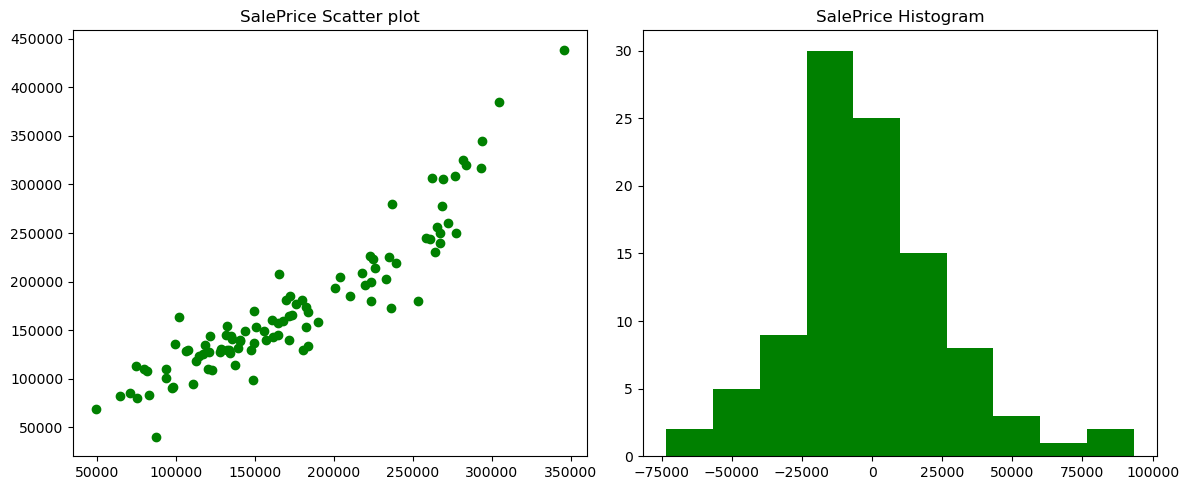

In [61]:
# we are trying to know how good is the model on how much was predicted of SalePrice
print(f"R62 is: {model.score(X,Y)}")
# below rows and columns will define how many figures displayed
n_rows=1
n_cols=2
# subplot using the cols and rows defined above and choosing figure size (12,5)
fig, axes = plt.subplots(n_rows,n_cols,figsize=(12, 5))
# display the first figure using axes object and scatter function 
ax = axes[0]
ax.set_title(f'SalePrice Scatter plot')
ax.scatter(predictions,Y, color ='green')
# display the second figure using axes object and hist function to show histogram 
ax = axes[1]
ax.set_title(f'SalePrice Histogram')
ax.hist(Y - predictions, color ='green') 

fig.tight_layout()
plt.show()

R62 is: 0.7215512391501984


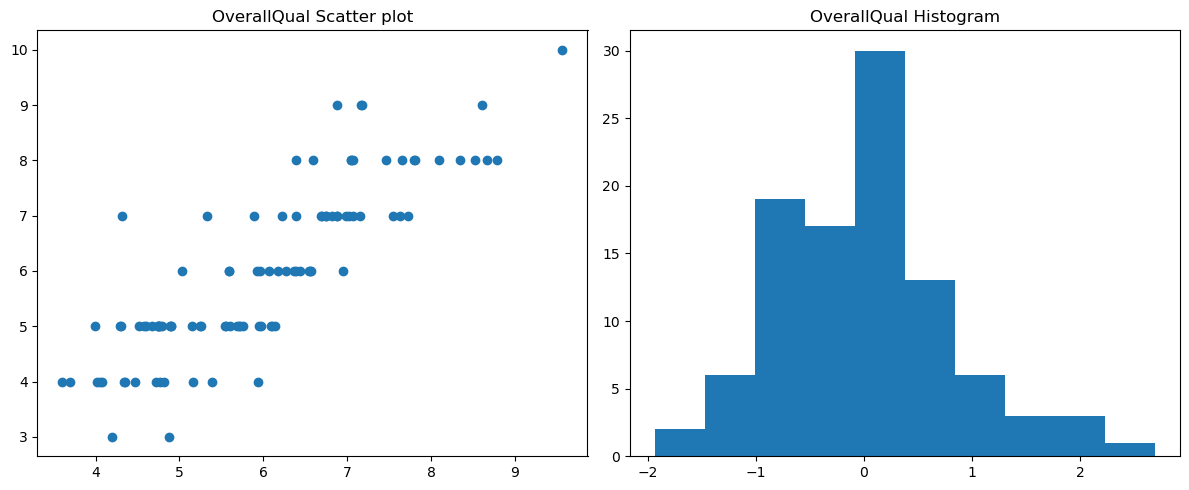

In [62]:
# we are trying to know how good is the model on how much was predicted of OverallQual
print(f"R62 is: {model1.score(X1,Y1)}")
# below rows and columns will define how many figures displayed
n_rows=1
n_cols=2
# subplot using the cols and rows defined above and choosing figure size (12,5)
fig, axes = plt.subplots(n_rows,n_cols,figsize=(12, 5))
# display the first figure using axes object and scatter function 
ax = axes[0]
ax.set_title(f'OverallQual Scatter plot')
ax.scatter(predictions1,Y1)
# display the second figure using axes object and hist function to show histogram 
ax = axes[1]
ax.set_title(f'OverallQual Histogram')
ax.hist(Y1 - predictions1) 

fig.tight_layout()
plt.show()

R62 is: 0.8092486026074048


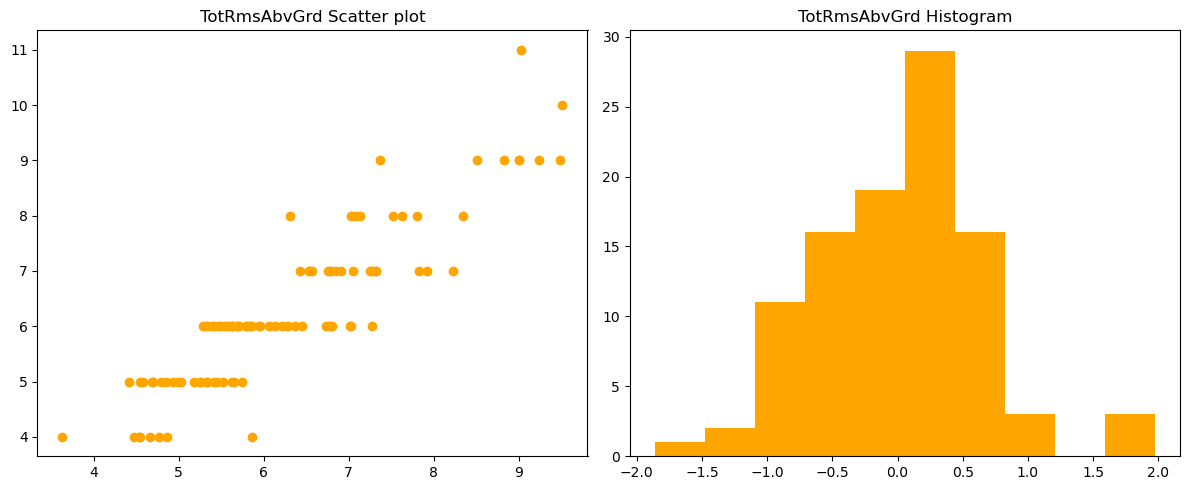

In [77]:
# we are trying to know how good is the model on how much was predicted of TotRmsAbvGrd
print(f"R62 is: {model2.score(X2,Y2)}")
# below rows and columns will define how many figures displayed
n_rows=1
n_cols=2
# subplot using the cols and rows defined above and choosing figure size (12,5)
fig, axes = plt.subplots(n_rows,n_cols,figsize=(12, 5))
# display the first figure using axes object and scatter function 
ax = axes[0]
ax.set_title(f'TotRmsAbvGrd Scatter plot')
ax.scatter(predictions2,Y2, color ='orange')
# display the second figure using axes object and hist function to show histogram 
ax = axes[1]
ax.set_title(f'TotRmsAbvGrd Histogram')
ax.hist(Y2 - predictions2, color ='orange') 

fig.tight_layout()
plt.show()

[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

In this sections I used jtest.csv dataset to compare to the above cleaned dataset, which I found below: 
+ I couldn't run predict() function on a dataset that include NaN values, so I cleaned it from all NaN values. 
+ I found that the prediction of the jtest showed a 0.75 score which noticeable difference on what is achieved above 0.85. 
+ The jtest.csv dataset included as a start 81 column and only 8 columns after the drop of NaN values. Meanwhile, houseSmallData.csv included 32 columns after the data cleaning.
+ In result, I believe due to the jtest.csv contain many null values this resulted in having a much less sample for prediction in comparison to the houseSmallData.csv dataset.

In [73]:
## reading full data 
test = pd.read_csv('C:/Users/Rawan/Desktop/MITCN/M7/jtest/jtest.csv', index_col=0)
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
198,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000


In [74]:
original = test.select_dtypes(include=[np.number]).interpolate().dropna(axis=1)
# prediction based on full data
X = original[cols]
Y = X['SalePrice']
X = X.drop(['SalePrice'],axis = 1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF,GarageYrBlt,FullBath
100,6,1610,480,2,1977,1610,1977.0,2
101,6,1732,476,2,1985,741,1985.0,2
102,5,1535,410,2,1979,0,1979.0,2
103,7,1226,740,3,2009,1226,2009.0,2
104,7,1818,240,1,1931,1040,1951.0,1
...,...,...,...,...,...,...,...,...
195,6,1456,440,2,1976,855,1976.0,2
196,7,1726,786,3,2007,1726,2007.0,2
197,8,3112,795,2,1918,1360,1918.0,2
198,6,2229,0,0,1912,755,1961.0,1


In [75]:
# prediction
predictions_full = model.predict(X)
print(f"R62 is: {model.score(X,Y)}")

R62 is: 0.7568141473620061


[Back to top](#Index)

## Conclusion

In conclusion, I found that that Linear Regression works well the more correlation the independent variable has with independent variables, and calculating the independent variables along with larger number of highly correlated dependent variables will increase the prediction score with linear regression. 

In addition, a careful data cleaning can be impactful to the prediction accuracy as by removing data you might experience a loss of the data that can be used in the prediction and it would show a worst prediction score.


[Back to top](#Index
)
## References


- MACDONALD, ALAN. “What Does Above Grade Mean? | Edmonton Real Estate Definition.” Gimme-Shelter. 2024. https://www.gimme-shelter.com/above-grade-50066/

- Dela Cruz, Antonette. “Skewness in Statistics | Definition, Formula & Examples.” Study.com. 2023. https://study.com/academy/lesson/skewness-in-statistics-definition-formula-example.html

- Wigmore, Ivy. “correlation.” techtarget. 2020. https://www.techtarget.com/whatis/definition/correlation

- IBM. “What is linear regression?.” ibm. 2024. https://www.ibm.com/topics/linear-regression
